In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import networkx as nx
import os

In [2]:
def TodaysDate():
        
    Today = datetime.date.today()
    TodaysDate = Today.strftime('%d%b%Y')
    
    return TodaysDate

In [3]:
def DNAcoding_sequence(DNASequence, QualityScoreSequence, start_sequence, stop_sequence):
#utilises ONLY ONE stop_sequence, returns ONLY ONE coding_sequence
    
    QualityScoreString = """!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~"""
    ThresholdQualityScore = 29 # ThresholdQualityScore must be between 0 and 93
    ThresholdQualityString = QualityScoreString[ThresholdQualityScore:]
    
    MinLength = 24
    MaxLength = 240
            
    StartIndex = DNASequence.find(start_sequence) + len(start_sequence)
    StopIndex = DNASequence.rfind(stop_sequence)
    coding_sequence =  DNASequence[StartIndex:StopIndex]
    if MinLength <= len(coding_sequence) and len(coding_sequence) <= MaxLength and len(coding_sequence)%3 == 0:
        for Character in QualityScoreSequence[StartIndex:StopIndex]:
            if Character not in ThresholdQualityString:
                return None
        return str(coding_sequence)

In [4]:
def Translation(coding_sequence):
#translates DNA sequence

    TranslationCode = {
                    'AAA':'K','AAC':'N','AAG':'K','AAU':'N',
                    'ACA':'T','ACC':'T','ACG':'T','ACU':'T',
                    'AGA':'R','AGC':'S','AGG':'R','AGU':'S',
                    'AUA':'I','AUC':'I','AUG':'M','AUU':'I',
                    
                    'CAA':'Q','CAC':'H','CAG':'Q','CAU':'H',
                    'CCA':'P','CCC':'P','CCG':'P','CCU':'P',
                    'CGA':'R','CGC':'R','CGG':'R','CGU':'R',
                    'CUA':'L','CUC':'L','CUG':'L','CUU':'L',
                    
                    'GAA':'E','GAC':'D','GAG':'E','GAU':'D',
                    'GCA':'A','GCC':'A','GCG':'A','GCU':'A',
                    'GGA':'G','GGC':'G','GGG':'G','GGU':'G',
                    'GUA':'V','GUC':'V','GUG':'V','GUU':'V',
                    
                    'UAA':'#','UAC':'Y','UAG':'*','UAU':'Y',
                    'UCA':'S','UCC':'S','UCG':'S','UCU':'S',
                    'UGA':'&','UGC':'C','UGG':'W','UGU':'C',
                    'UUA':'L','UUC':'F','UUG':'L','UUU':'F'
                        }
    # UAA (ochre) — #
    # UAG (amber) — *
    # UGA (opal) — &
                    
    TranscriptionCode = {'A':'A','C':'C','G':'G','T':'U','U':'T'}
      
    RNASequence = ''
    for Nucleotide in coding_sequence:
        RNASequence += TranscriptionCode.get(Nucleotide,'X')
    #converts DNA to RNA
    #print RNASequence
        
    peptide = ''
    while len(RNASequence) != 0:
        peptide += TranslationCode.get(RNASequence[0:3],'Do not fuck with me!')
        RNASequence = RNASequence[3:]
    return peptide

In [5]:
def SingleSelectionRoundSummary(fastq_file_path):
#returns a list of lists with peptide-sequences and their frequencies, sorted by frequency in descending order
    
    RawDataFile = open(fastq_file_path, 'r')
    lines = RawDataFile.readlines()
    RawDataFile.close
    
    #start_sequence = 'ATG' # Met codon
    #stop_sequence = 'TGCGGCAGC'# Akane seams to have trimmed siquences
    #stop_sequence = 'TAG' # amber stop codon
    
    start_sequence = 'TAATACGACTCACTATAGGGTTAACTTTAAGAAGGAGATATACATATG'    # NNK - T7g10M.F48 
    stop_sequence = 'TGCGGCAGCGGCAGCGGCAGCTAGGACGGGGGGCGGAAA' #NNK - CGS3an13.R39 
    #start_sequence = 'TAATACGACTCACTATAGGGTTGAACTTTAAGTAGGAGATATATCCATG'   #NNU - T7-CH-F49
    #stop_sequence = 'TGTGGGTCTGGGTCTGGGTCTTAGGACGGGGGGCGGAAA'  #NNU - CGS3-CH-R39
    
    SingleSelectionRoundSummary = {}
    #creates empty SingleSelectionRoundSummary dictionary to store the results from a single round of selection
    #SingleSelectionRoundSummary = {peptideY:    {coding_sequence_YZ:    Occurrence_YZ}}
        
    #populates SingleSelectionRoundSummary dictionary with the results from a single round of selection
    for i,line in enumerate(lines):
        if start_sequence in line and stop_sequence in line:
            coding_sequence = DNAcoding_sequence(line, lines[i + 2], start_sequence, stop_sequence)
            if coding_sequence != None:
                peptide = Translation(coding_sequence)
                if peptide not in SingleSelectionRoundSummary:
                    SingleSelectionRoundSummary[str(peptide)] = {str(coding_sequence) : 1}
                else:
                    if coding_sequence not in SingleSelectionRoundSummary[str(peptide)]:
                        SingleSelectionRoundSummary[str(peptide)][str(coding_sequence)] = 1
                    else:
                        SingleSelectionRoundSummary[str(peptide)][str(coding_sequence)] += 1

    return SingleSelectionRoundSummary

In [6]:
def HammingDistance(Sequence1, Sequence2):
    
    if len(Sequence1) < len(Sequence2):
        Sequence1 = Sequence1 + (len(Sequence2) - len(Sequence1)) * '%'
    elif len(Sequence1) > len(Sequence2):
        Sequence2 = Sequence2 + (len(Sequence1) - len(Sequence2)) * '%'
    
    HammingDistance = 0
    for i in range(len(Sequence1)):
        if Sequence1[i] == Sequence2[i]:
            HammingDistance = HammingDistance
        else:
            HammingDistance = HammingDistance + 1
            
    return HammingDistance

In [7]:
def HammingDistanceBasedFormating(Sequence1, Sequence2):
    
    if len(Sequence1) < len(Sequence2):
        Sequence1 = Sequence1 + (len(Sequence2) - len(Sequence1)) * '-'
    elif len(Sequence1) > len(Sequence2):
        Sequence2 = Sequence2 + (len(Sequence1) - len(Sequence2)) * '-'
    
    HammingDistance = 0
    FormatedSequence2 = ''
    for i in range(len(Sequence1)):
        if Sequence1[i] == Sequence2[i]:
            FormatedSequence2 += Sequence2[i].lower()
            HammingDistance = HammingDistance
        else:
            FormatedSequence2 += Sequence2[i]
            HammingDistance = HammingDistance + 1            
    return FormatedSequence2

In [8]:
def Completedisplay_summary(data_directory_path):
# returns a display_summary dictionary with the following structure
# display_summary = {SelectionRound_X:    {peptideXY:    {CodingDNA_XYZ:    Occurrence_XYZ}}}

    Completedisplay_summary = {}
    # creates empty display_summary dictionary to store the results from all the rounds of selection

    for file in os.listdir(data_directory_path):
        
        file_path = os.path.join(data_directory_path, file)
          
        if file.endswith('.fastq'): # this conditional is necessary; without it some shit appears in the beginning of the file list
            cycle_numberFirstDigit = file[file.find('.')-2]
            cycle_numberSecondDigit = file[file.find('.')-1]
            if cycle_numberFirstDigit == '0':
                cycle_number = int(cycle_numberSecondDigit)
                #print cycle_number
            elif cycle_numberFirstDigit != '0':
                cycle_number = int(file[file.find('.')-2 : file.find('.')])
                #print cycle_number
        #(1.A) extracts the round number from the file name (file name should have two digit number before full stop — '00.') 
                
            SelectionRoundSummary = SingleSelectionRoundSummary(file_path)
            #(1.B) extracts single round results 
                    
            Completedisplay_summary[cycle_number] = SelectionRoundSummary
            #(1.C) populate ConcatenatedResultsList
            #print ConcatenatedResultsList
            
    return Completedisplay_summary

In [9]:
def peptidesOccurrences_BY_Round(data_directory_path):
    display_summary = Completedisplay_summary(data_directory_path)
    
    peptidesOccurrences_BY_Round = {}
    for Round in display_summary:
        peptidesOccurrences_IN_Round = {}
        for peptide in display_summary[Round]:
            peptidesOccurrences_IN_Round[peptide] = sum(display_summary[Round][peptide].values())
        peptidesOccurrences_BY_Round[Round] = peptidesOccurrences_IN_Round
        
    return peptidesOccurrences_BY_Round

In [10]:
def DNAsOccurrences_BY_Round(data_directory_path):
    display_summary = Completedisplay_summary(data_directory_path)
    
    DNAsOccurrences_BY_Round = {}
    for Round in display_summary:
        DNAsOccurrences_IN_Round = {}
        for peptide in display_summary[Round]:
            for DNA in display_summary[Round][peptide]:
                DNAsOccurrences_IN_Round[DNA] = display_summary[Round][peptide][DNA]
        DNAsOccurrences_BY_Round[Round] = DNAsOccurrences_IN_Round

    return DNAsOccurrences_BY_Round

In [11]:
def TotalReads_BY_Round(data_directory_path):
    display_summary = Completedisplay_summary(data_directory_path)
    peptides_BY_Round = peptidesOccurrences_BY_Round(data_directory_path)
    
    TotalReads_BY_Round = {}
    for Round in display_summary:
        TotalReads_BY_Round[Round] = sum(peptides_BY_Round[Round].values())
        
    return TotalReads_BY_Round

In [12]:
def BaseRoundSortedpeptidesList(data_directory_path, base_cycle):
    peptides_BY_Round = peptidesOccurrences_BY_Round(data_directory_path)  
            
    peptidesOccurrencesInBaseRound = peptides_BY_Round[base_cycle]
    BaseRoundSortedpeptidesList = sorted(peptidesOccurrencesInBaseRound, key = peptidesOccurrencesInBaseRound.get, reverse = True)
    
    return BaseRoundSortedpeptidesList

In [13]:
def BaseRoundSortedDNAsList(data_directory_path, base_cycle):
    DNAs_BY_Round = DNAsOccurrences_BY_Round(data_directory_path)  
            
    DNAsOccurrences_IN_BaseRound = DNAs_BY_Round[base_cycle]
    BaseRoundSortedDNAsList = sorted(DNAsOccurrences_IN_BaseRound, key = DNAsOccurrences_IN_BaseRound.get, reverse = True)
    
    return BaseRoundSortedDNAsList

In [14]:
def DNAClonesOccurrences_BY_Round_BY_peptide(data_directory_path):
    display_summary = Completedisplay_summary(data_directory_path)
    
    DNAClonesOccurrences_BY_Round_BY_peptide = {}
    for Round in display_summary:
        DNAClonesOccurrences_BY_peptide = {}
        for peptide in display_summary[Round]:
            DNAClonesOccurrences_BY_peptide[peptide] = len(display_summary[Round][peptide])
        DNAClonesOccurrences_BY_Round_BY_peptide[Round] = DNAClonesOccurrences_BY_peptide
        
    return DNAClonesOccurrences_BY_Round_BY_peptide

In [15]:
def peptidesAppearances_BY_Round(BaseRoundSortedpeptidesList, peptidesOccurrences_BY_Round):
    
    peptidesAppearances_BY_Round = {}
    
    for peptide in BaseRoundSortedpeptidesList:
        peptidesAppearances_BY_Round[peptide] = []
        for Round in peptidesOccurrences_BY_Round:
            if peptide in peptidesOccurrences_BY_Round[Round]:
                peptidesAppearances_BY_Round[peptide] += [Round]
    return peptidesAppearances_BY_Round

In [16]:
def DNAsAppearances_BY_Round(BaseRoundSortedDNAsList, DNAsOccurrences_BY_Round):
    
    DNAsAppearances_BY_Round = {}
    
    for DNA in BaseRoundSortedDNAsList:
        DNAsAppearances_BY_Round[DNA] = []
        for Round in DNAsOccurrences_BY_Round:
            if DNA in DNAsOccurrences_BY_Round[Round]:
                DNAsAppearances_BY_Round[DNA] += [Round]
    return DNAsAppearances_BY_Round

In [17]:
def peptidesSummaryDNAPerspectiveReport(data_directory_path, base_cycle, peptidesSummaryFileName):
    
    # to extract TodaysDate
    today = TodaysDate()
    
    # to collect DNAs-based summary information By_Round
    DNAs_BY_Round = DNAsOccurrences_BY_Round(data_directory_path)
    TotalDNAs_BY_Round = TotalReads_BY_Round(data_directory_path)
    BaseRoundSortedDNAs = BaseRoundSortedDNAsList(data_directory_path, base_cycle)
    DNAsAppearances = DNAsAppearances_BY_Round(BaseRoundSortedDNAs, DNAs_BY_Round)
    
    # to collect peptides-based summary information By_Round
    peptides_BY_Round = peptidesOccurrences_BY_Round(data_directory_path)
    Totalpeptides_BY_Round = TotalReads_BY_Round(data_directory_path)
    BaseRoundSortedpeptides = BaseRoundSortedpeptidesList(data_directory_path, base_cycle)
    peptidesAppearances = peptidesAppearances_BY_Round(BaseRoundSortedpeptides, peptides_BY_Round)
    
    display_summary = Completedisplay_summary(data_directory_path)
    SortedRoundsList = sorted(display_summary.keys())    
    
    # to create a disjoint graph (Forest), based on DNAs in the BaseRound (joint subgraphs are the Trees and the unique DNA sequences are the Leaves)
    BaseRoundDNAsForest = nx.Graph()
    # to add nodes (Leaves, unique DNA sequences) to the BaseRoundDNAsForest disjoint graph
    BaseRoundDNAsForest.add_nodes_from(BaseRoundSortedDNAs)
    # to add edges (Twigs, DNA-to-DNA connections based on the hamming distance between unique DNA sequences) to the BaseRoundDNAsForest so that disjoint graphs (stand alone Trees) can be identified
    UsedNodes = []
    for DNA1 in BaseRoundSortedDNAs:
        UsedNodes += [DNA1]
        for DNA2 in BaseRoundSortedDNAs:
            if DNA2 not in UsedNodes and HammingDistance(DNA1, DNA2) == 1:
                BaseRoundDNAsForest.add_edge(DNA1,DNA2,
                                                MutationsNumber = 1)
    # to extract individual joint subgraphs (stand alone Trees) from the disjoint graph (Forest)
    BaseRoundDNAsTrees = list(nx.connected_component_subgraphs(BaseRoundDNAsForest, copy = True))
    
    # to create a peptideSummaryDNAPerspectiveCSV file
    peptidesSummaryFileNameCSV =  str(today) + 'peptideFamiliesSummary' + peptidesSummaryFileName + '.csv'
    peptidesSummaryFile = open(peptidesSummaryFileNameCSV, 'w')
    
    # to convert list of DNAs Trees into a list of peptides Trees Leaves
    peptidesTreesLeaves = []
    for DNAsTree in BaseRoundDNAsTrees:
        peptideLeaves = []
        for DNA in DNAsTree:
            peptide = Translation(DNA)
            if peptide not in peptideLeaves:
                peptideLeaves += [peptide]
        peptidesTreesLeaves += [peptideLeaves]
    # to sort the resulting list of lists from the largest to smallest
    peptidesTreesLeaves.sort(key = len, reverse = True)
    
    # to fix the coordinates of the origin of the graph
    Positions = {}
    X_0_Coordinate = 1
    Y_0_Coordinate = 0
    Y_X0_Coordinate = 0
    
    TreesXCoordinates = []
        
    
    # Create a figure of size 8x6 inches, 500 dots per inch
    plt.figure(figsize = (8, 6),
               dpi = 500)
    # Create 'ggplot' style
    plt.style.use('fivethirtyeight')
    # Create a new subplot from a grid of 1x1
    plt.subplot(1, 1, 1)
    
    #to introduce peptideFamilyCounter
    MultiplepeptideFamilyCounter = 0
    #to introduce SinglepeptideFamilyCounter
    SinglepeptideFamilyCounter = 0
    #to introduce peptideFamilySize
    peptideTreeSize = []
    
    
    # to count peptides, which appear in multiple trees
    Uniquepeptides = []
    Reoccuringpeptides = []
    
    # to create a tree for each set of peptides Trees Leaves 
    for peptideLeaves in peptidesTreesLeaves:
        
        peptideTree = nx.Graph()
        # to convert each peptide (Leave) into a node of a peptide graph (peptideLeave on a peptideTree)
        
        for peptide in peptideLeaves:
            peptideTree.add_node(peptide,
                                        Occurrence = peptides_BY_Round[base_cycle][peptide],
                                        FirstAppearance = min(peptidesAppearances[peptide]))
        # to join the peptide nodes of a graph by edges (Twigs)
        for peptide1 in peptideLeaves:
            for peptide2 in peptideLeaves:
                if HammingDistance(peptide1, peptide2) == 1:
                    peptideTree.add_edge(peptide1,peptide2)
        
        # to identify the Rootpeptide of a peptideTree graph
        TreepeptidesOccurrences = nx.get_node_attributes(peptideTree, 'Occurrence')              
        Rootpeptide = max(TreepeptidesOccurrences, key=TreepeptidesOccurrences.get)
        
        # to create a dictionary holder for peptide and their properties (Predecessor and Occurrence)
        Treepeptides = {}
        Treepeptides[Rootpeptide] = [0, '', 0, peptideTree.node[Rootpeptide]['Occurrence'], peptideTree.node[Rootpeptide]['FirstAppearance']]
        TreepeptidesList = list(peptideTree.nodes())
        TreepeptidesList.remove(Rootpeptide)

        for peptide in TreepeptidesList:
            peptidePredecessor = nx.shortest_path(peptideTree, source = peptide, target = Rootpeptide, weight = None)[1]
            # PredecessorOccurrence can be used to sort the peptides, but does not seem to be useful
            PredecessorOccurrence = peptideTree.node[peptidePredecessor]['Occurrence']
            peptideOccurrence = peptideTree.node[peptide]['Occurrence']

            Treepeptides[peptide] = [peptidePredecessor, PredecessorOccurrence, peptideOccurrence]
            
        
        # to sort peptides in a peptideTree by their distance to the Rootpeptide
        peptides_BY_DistanceToTheRoot = {}
        for peptide in peptideTree.nodes():
            DistanceToTheRoot = nx.shortest_path_length(peptideTree, source = peptide, target = Rootpeptide, weight = None)
            if DistanceToTheRoot not in peptides_BY_DistanceToTheRoot:
                peptides_BY_DistanceToTheRoot[DistanceToTheRoot] = [peptide]
            else:
                peptides_BY_DistanceToTheRoot[DistanceToTheRoot] += [peptide]
        
        # to identify the largest group of equidistanced peptides 
        MaxpeptidesNumber = max(map(lambda k: len(peptides_BY_DistanceToTheRoot[k]), peptides_BY_DistanceToTheRoot))

        Sortedpeptides_BY_DistanceToTheRoot = {}
        # to sort peptides by their distance to the Rootpeptide
        for DistanceToTheRoot in peptides_BY_DistanceToTheRoot:

            Equidistantpeptides = peptides_BY_DistanceToTheRoot[DistanceToTheRoot]

            Equidistantpeptides = sorted(Equidistantpeptides, key = lambda peptide: (Treepeptides[peptide][2]), reverse = True)
            # PredecessorOccurrence can be used to sort the peptides, but does not seem to be useful
            # Equidistantpeptides = sorted(Equidistantpeptides, key = lambda peptide: (Treepeptides[peptide][1]), reverse = True)
            Equidistantpeptides = sorted(Equidistantpeptides, key = lambda peptide: (Treepeptides[peptide][0]), reverse = False)

            AdditionalElements = MaxpeptidesNumber - len(Equidistantpeptides)
            Sortedpeptides_BY_DistanceToTheRoot[DistanceToTheRoot] = Equidistantpeptides + AdditionalElements * ['']

            if len(peptideTree.nodes()) > 1:
                for peptide in Equidistantpeptides:
                    XCoordinate = X_0_Coordinate + DistanceToTheRoot
                    YCoordinate = Y_0_Coordinate - Equidistantpeptides.index(peptide)
                    Positions[peptide] = (XCoordinate, YCoordinate)
                    
                                    
            elif len(peptideTree.nodes()) == 1:
                for peptide in Equidistantpeptides:
                    XCoordinate = 0
                    YCoordinate = Y_X0_Coordinate
                    Positions[peptide] = (XCoordinate, YCoordinate)
                    

        #BaseRoundpeptidesGraph = nx.Graph()    
        #BaseRoundpeptidesGraph.add_nodes_from(BaseRoundSortedpeptides)

        Sizes = []
        for peptide in peptideTree.nodes():
            Sizes.append(math.log(peptides_BY_Round[base_cycle][peptide], 2) + 5)

        Colours = []
        for peptide in peptideTree.nodes():
            Colours.append(min(peptidesAppearances[peptide]))
        
        XSpan = max(map(lambda peptide: Positions[peptide][0], Positions)) - min(map(lambda peptide: Positions[peptide][0], Positions))
        YSpan = max(map(lambda peptide: Positions[peptide][1], Positions)) - min(map(lambda peptide: Positions[peptide][1], Positions))
                            
        XMin = min(map(lambda peptide: Positions[peptide][0], Positions)) - 0.01 * XSpan
        XMax = max(map(lambda peptide: Positions[peptide][0], Positions)) + 0.01 * XSpan
        YMin = min(map(lambda peptide: Positions[peptide][1], Positions)) - 0.02 * YSpan
        YMax = max(map(lambda peptide: Positions[peptide][1], Positions)) + 0.02 * YSpan
        
        
        
        NumberOfColours = len(SortedRoundsList)
        
        ColourMap = plt.get_cmap('Paired', NumberOfColours)
        
        nx.draw_networkx(peptideTree,
                        pos = Positions,
                        node_size = Sizes,
                        node_color = Colours,
                        cmap = ColourMap,
                        linewidths = 0.2,
                        width = 0.2,
                        with_labels = False,
                        #font_size = 6,
                        vmin = min(SortedRoundsList),
                        vmax = max(SortedRoundsList))
                    
        if len(peptideTree.nodes()) > 1:
            for DistanceToTheRoot in Sortedpeptides_BY_DistanceToTheRoot:
                peptidesSummaryFile.write(str(DistanceToTheRoot) + ' mutations' + ',' + 'frequency' + ',' + 'index' + ',' + 'cDNA mutants' + ',' + 'reoccurrence' + ',')
            peptidesSummaryFile.write('\n')

        for i in range(MaxpeptidesNumber):
            for MutationsNumber in Sortedpeptides_BY_DistanceToTheRoot:                        
                peptide = Sortedpeptides_BY_DistanceToTheRoot[MutationsNumber][i]

                if peptide != '':
                    if peptide not in Uniquepeptides:
                        Uniquepeptides += [peptide]
                        peptideReoccurrence = 'NO'
                    else:
                        Reoccuringpeptides += [peptide]
                        peptideReoccurrence = 'YES'
                        
                    Formatedpeptide = HammingDistanceBasedFormating(Rootpeptide, peptide)
                    peptideIndex = str(BaseRoundSortedpeptides.index(peptide) + 1)
                    #ClonesNumber = str(len(peptideTree.neighbors(peptide)))
                    peptideFraction = ('{:.2%}'.format(float((peptides_BY_Round[base_cycle].get(peptide, 0)))/float(Totalpeptides_BY_Round[base_cycle])))
                    peptidecDNAMutants = str(len(display_summary[base_cycle][peptide]))
                else:
                    Formatedpeptide = ''
                    #ClonesNumber = ''
                    peptideIndex = ''
                    peptideFraction = ''
                    peptidecDNAMutants = ''
                    peptideReoccurrence = ''

                peptidesSummaryFile.write(Formatedpeptide + ',' +
                            peptideFraction + ',' +
                            peptideIndex + ',' +
                            peptidecDNAMutants + ',' +
                                         peptideReoccurrence + ',')
                            #ClonesNumber + ',')
            peptidesSummaryFile.write('\n')
        
        
        if len(peptideTree.nodes()) > 1:
            TreesXCoordinates += [X_0_Coordinate]
            X_0_Coordinate += max(peptides_BY_DistanceToTheRoot.keys()) + 1
            MultiplepeptideFamilyCounter += 1
            peptideTreeSize += [len(peptideTree.nodes())]
            
            

        if len(peptideTree.nodes()) == 1:
            Y_X0_Coordinate -= 1
            SinglepeptideFamilyCounter += 1

        peptidesSummaryFile.write('\n')
                    
    peptidesSummaryFile.close()
    
    #plt.axis('off')
    plt.axis([XMin, XMax, YMin, YMax])
        
    ColourMap = plt.get_cmap('Paired', NumberOfColours)
    peptideLegendColours = SortedRoundsList
    
    LegendDotsX = XMax - 0.6 * XMax
    YIncrement = 0.03 * YMin
    #print (YIncrement)
    
    LegendColourDotsX = np.array([LegendDotsX] * NumberOfColours)
    #print (LegendColourDotsX)
    FirstYColours = YMin + 12 * (- YIncrement)
    #print (FirstYColours)
    LastYColours = YMin + (12 + NumberOfColours) * (- YIncrement)
    #print (LastYColours)
    LegendColourDotsY = np.linspace(FirstYColours, LastYColours, NumberOfColours, endpoint = False)
    #print (LegendColourDotsY)
    
    plt.scatter(x = LegendColourDotsX,
                y = LegendColourDotsY,
                s = 15,
                c = peptideLegendColours,
                cmap = ColourMap,
                linewidths = 0.2)
    
    ColourLabels = SortedRoundsList
#     ColourLabels = ['{0}'.format(i) for i in range(1,NumberOfColours + 1)]

    for label, x, y in zip(ColourLabels, LegendColourDotsX, LegendColourDotsY):
        plt.annotate(label, xy = (x, y), xytext = (5, 0),
                     textcoords = 'offset points',
                     fontsize = 5,
                     ha = 'left', va = 'center')
    plt.text(x = LegendDotsX, y = (max(LegendColourDotsY) - YIncrement),
             s = 'First-appearance cycle is mapped onto the colour of the markers.',
             fontsize = 5)
    #plt.axis('off')

    Size = []
    for i in [1, 10, 100, 1000, 10000]:
        Size.append(math.log(i, 2) + 5)

    LegendSizeDotsX = np.array([LegendDotsX] * 5)
    FirstYSizes = YMin + 5 * (- YIncrement)
    LastYSizez = YMin + 10 * (- YIncrement)
    
    LegendSizeDotsY = np.linspace(FirstYSizes, LastYSizez, 5, endpoint = False)
    plt.scatter(x = LegendSizeDotsX,
                y = LegendSizeDotsY,
                s = Size,
                c = 'gray',
                linewidths = 0.2)

    SizeLabels = ['{0}'.format(i) for i in [1, 10, 100, 1000, 10000]]

    for label, x, y in zip(SizeLabels, LegendSizeDotsX, LegendSizeDotsY):
        plt.annotate(label, xy = (x, y), xytext = (5, 0),
                     textcoords = 'offset points',
                     fontsize = 5,
                     ha = 'left', va = 'center')
    plt.text(x = LegendDotsX, y = (max(LegendSizeDotsY) - 0.03 * YMin),
             s = 'peptide-frequencies as observed in the last cycle are mapped onto the marker size.',
             fontsize = 5)
    
    for i in range(len(peptideTreeSize)):
        plt.text(x = TreesXCoordinates[i], y = - YIncrement,
                 s = peptideTreeSize[i],
                 fontsize = 5)
    
    
    plt.text(x = LegendDotsX, y = YMax + 10 * YIncrement,
             s = ('Circle markers on the graph represent unique peptides as observed in the final cycle of selection.'),
             fontsize = 5)    
    plt.text(x = LegendDotsX, y = YMax + 11 * YIncrement,
             s = ('In total, ' + str(len(BaseRoundSortedpeptides)) +  ' unique peptides were observed in the final cycle of selection.' ),
             fontsize = 5)
    plt.text(x = LegendDotsX, y = YMax + 12 * YIncrement,
             s = ('lines connecting two circle markers indicate that two connected peptides differ by one amino acid.'),
             fontsize = 5)
    plt.text(x = LegendDotsX, y = YMax + 13 * YIncrement,
             s = ('The peptides in the final cycle form ' +
                  str(MultiplepeptideFamilyCounter) +
                  ' multiple-member peptide families, and ' +
                  str(SinglepeptideFamilyCounter) +
                  ' unrelated peptides.'),
             fontsize = 5)
    
    plt.axis('off')

    peptidesSummaryFileNamePNG = str(today) + 'peptideFamiliesSummary' + peptidesSummaryFileName + '.png'
    
    plt.savefig(peptidesSummaryFileNamePNG,
                dpi = 500)
    
    
    fig = plt.gcf()
    SizeInches = fig.get_size_inches()*fig.dpi
    SizeDots = fig.get_size_inches()
    
    plt.show()
    plt.close()
    
    #print (Uniquepeptides)
    #print (len(Uniquepeptides))
    print (Reoccuringpeptides)
    print (len(Reoccuringpeptides))

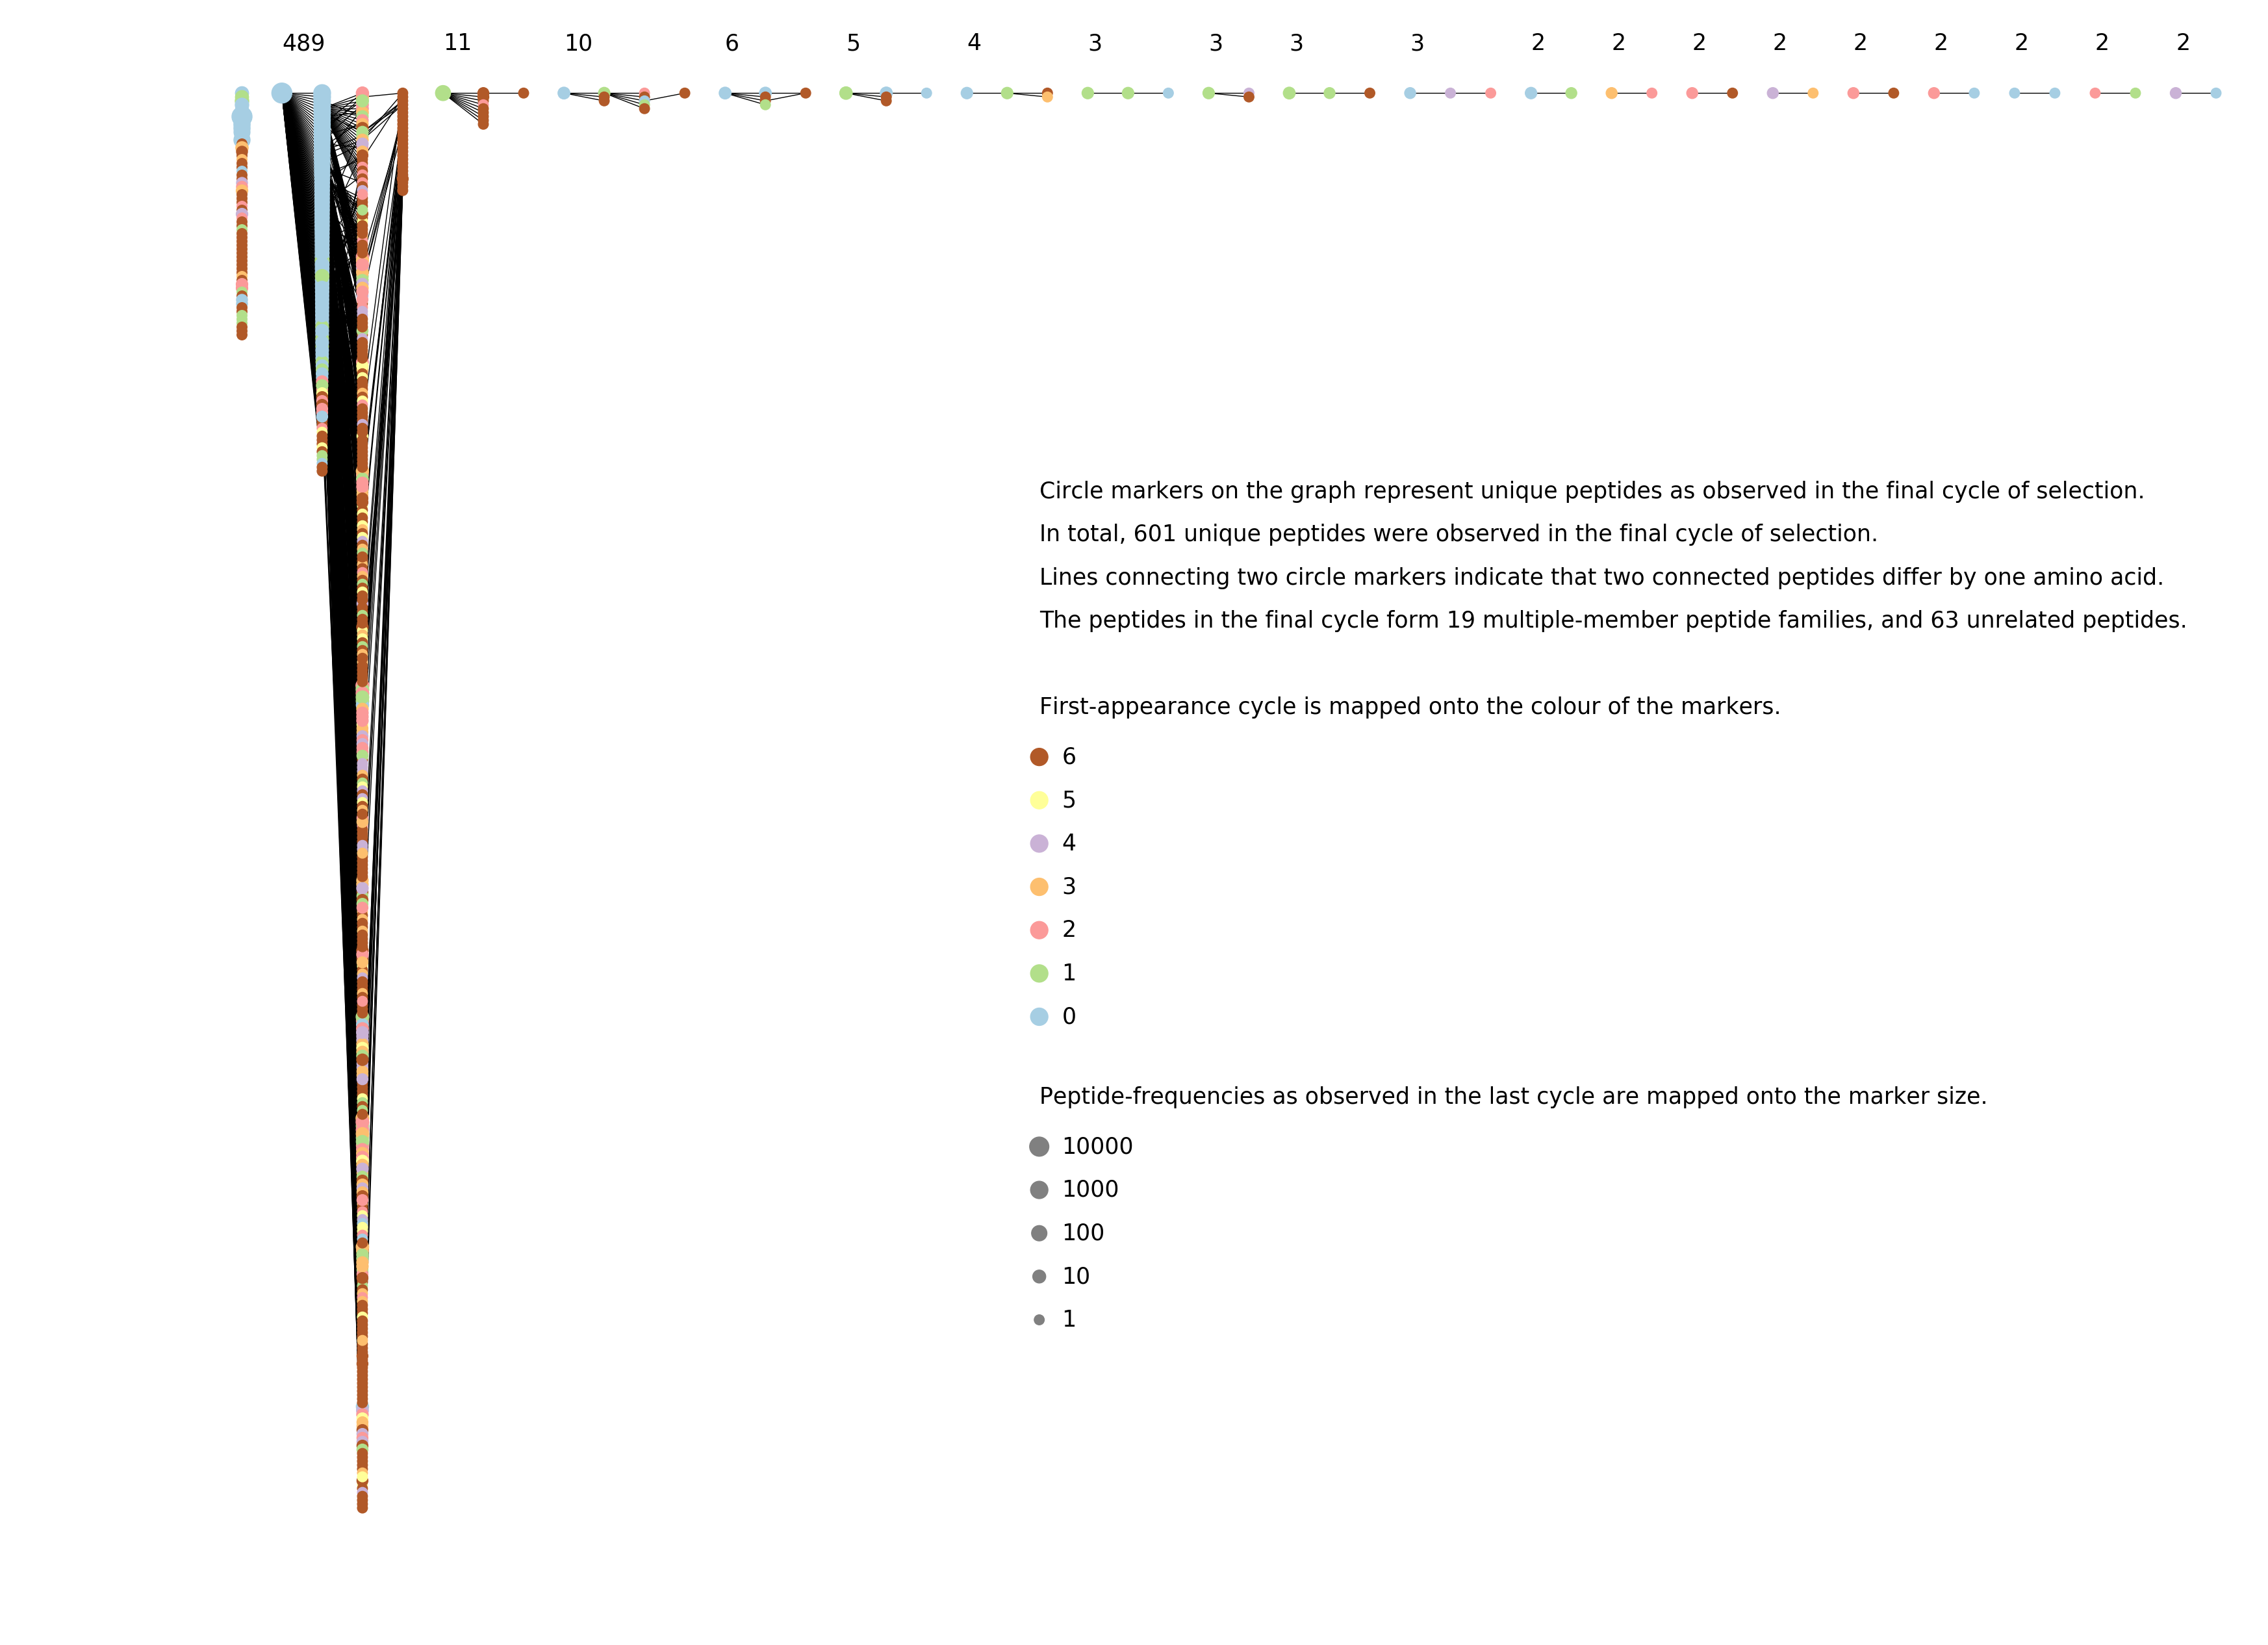

['VWDPRTFYLSRA', 'VWAPRTFYLSRI', 'VWDARTFYLSRI', 'VWDPRTFYLSRI', 'VWDPRAFYLSRI', 'VWDPRAFYLSRI', 'VWDPRTFYLSRV', 'VWDPRTFYLSGI', 'GWDPRTFYLSRI', 'VWDPGTFYLSRI', 'VWDPRAFYLSRT', 'IWDPRTFYSSRI', 'VWDPGTFYLSRT', 'VWDLRTSYLSRI', 'VWEPRTLYLSRI', 'VWDPLSRI', 'VWDPRTFYLSI']
17


In [18]:
data_directory_path = '/Users/nikita/Documents/DataSequensing/SelectionBias/MockSelection/SetOne/SequencingResults'
base_cycle = 6
TopNpeptidesNumber = 24
SummaryFileName = 'PHD2_NNK_MockSelection'

peptidesSummaryDNAPerspectiveReport(data_directory_path, base_cycle, SummaryFileName)